In [338]:
from requests import get
from bs4 import BeautifulSoup
import os
import re
from env import github_token, github_username
import scraper
import acquire_r
import pandas as pd
import json
import seaborn as sns
import time
import prepare_r
import matplotlib.pyplot as plt

In [2]:
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )

In [79]:
# List of urls to scrape
g_url = ['https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=forks&type=Repositories', ' https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=forks&type=Repositories'\
         'https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=forks&type=Repositories', 'https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=forks&type=Repositories',\
         'https://github.com/search?o=desc&p=5&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=6&q=stars%3A%3E1&s=forks&type=Repositories',\
        'https://github.com/search?o=desc&p=7&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=8&q=stars%3A%3E1&s=forks&type=Repositories',\
        'https://github.com/search?o=desc&p=9&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=10&q=stars%3A%3E1&s=forks&type=Repositories',\
        'https://github.com/search?o=desc&p=11&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=12&q=stars%3A%3E1&s=forks&type=Repositories']

In [83]:
def get_repos(urls):
    repo = []
    for url in urls:
        time.sleep(10)
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.text)
        text = soup.find_all(attrs={"f4 text-normal"})
        for i in text:
            repo.append(i.find('a')['href'])
    return repo


In [84]:
repos = get_repos(g_url)

In [91]:
repos

['/jtleek/datasharing',
 '/rdpeng/ProgrammingAssignment2',
 '/octocat/Spoon-Knife',
 '/tensorflow/tensorflow',
 '/SmartThingsCommunity/SmartThingsPublic',
 '/twbs/bootstrap',
 '/github/gitignore',
 '/rdpeng/ExData_Plotting1',
 '/tensorflow/models',
 '/nightscout/cgm-remote-monitor',
 '/facebook/react',
 '/DataScienceSpecialization/courses',
 '/angular/angular.js',
 '/jlord/patchwork',
 '/barryclark/jekyll-now',
 '/Snailclimb/JavaGuide',
 '/firstcontributions/first-contributions',
 '/bitcoin/bitcoin',
 '/spring-projects/spring-framework',
 '/vuejs/vue',
 '/getify/You-Dont-Know-JS',
 '/freeCodeCamp/freeCodeCamp',
 '/kubernetes/kubernetes',
 '/udacity/frontend-nanodegree-resume',
 '/mrdoob/three.js',
 '/TheAlgorithms/Python',
 '/LarryMad/recipes',
 '/ant-design/ant-design',
 '/d3/d3',
 '/apache/spark',
 '/DefinitelyTyped/DefinitelyTyped',
 '/django/django',
 '/apache/dubbo',
 '/996icu/996.ICU',
 '/justjavac/free-programming-books-zh_CN',
 '/ohmyzsh/ohmyzsh',
 '/scikit-learn/scikit-learn',

In [92]:
#repos = scraper.get_repos(g_url)

/Users/ravindersingh/codeup-data-science/nlp_project/git-language/scraper.py:28: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 28 of the file /Users/ravindersingh/codeup-data-science/nlp_project/git-language/scraper.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


In [93]:
f = open('data.json')
json_file = json.load(f)

In [301]:
df = pd.DataFrame(json_file)

In [302]:
df

,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
2,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
4,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...
...,...,...,...
95,danielmiessler/SecLists,PHP,![seclists.png](https://danielmiessler.com/ima...
96,ytdl-org/youtube-dl,Python,[![Build Status](https://travis-ci.org/ytdl-or...
97,josephmisiti/awesome-machine-learning,Python,# Awesome Machine Learning [![Awesome](https:/...
98,protocolbuffers/protobuf,C++,Protocol Buffers - Google's data interchange f...


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             100 non-null    object
 1   language         86 non-null     object
 2   readme_contents  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [304]:
df.isnull().sum()

repo                0
language           14
readme_contents     0
dtype: int64

In [305]:
df = df.dropna(axis =0)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             86 non-null     object
 1   language         86 non-null     object
 2   readme_contents  86 non-null     object
dtypes: object(3)
memory usage: 2.7+ KB


In [307]:
df = df.reset_index(drop = True)

In [308]:
df.language.value_counts()

JavaScript          23
Python              14
Java                 9
TypeScript           6
HTML                 5
C++                  4
CSS                  4
C                    4
Go                   3
PHP                  2
Jupyter Notebook     2
C#                   2
Scala                1
Groovy               1
Rust                 1
Dart                 1
Vue                  1
Shell                1
R                    1
Ruby                 1
Name: language, dtype: int64

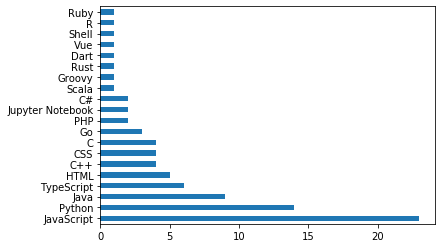

In [309]:
# bar plot showing repo counts by language
df.language.value_counts().plot.barh()

In [310]:
import re
import unicodedata
import pandas as pd
import nltk

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [311]:
df = df.drop(columns = ['repo'])

In [312]:
df1 = df.readme_contents.groupby(df.language).sum()

In [313]:
df1 = pd.DataFrame(df1).reset_index()

In [314]:
df1.head(4)

,language,readme_contents
0,C,[![Build status](https://github.com/git/git/wo...
1,C#,# ASP.NET Core Docs\n\nThis repository contain...
2,C++,"<div align=""center"">\n <img src=""https://www...."
3,CSS,"> March, 2016: If you're on an old version of ..."


In [315]:
df = prepare_r.prep_contents(df)

In [322]:
df = df.drop(columns = ['original', 'normalized', 'stemmed', 'lemmatized'])
df.head(4)

,language,readme_contents,cleaned
0,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...
1,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...
2,C++,"<div align=""center"">\n <img src=""https://www....",div align center img src tensorflow org image ...
3,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...,smartthings public repo official list smartapp...


In [319]:
df1 = prepare_r.prep_contents(df1)

In [323]:
df1 = df1.drop(columns = ['original', 'normalized', 'stemmed', 'lemmatized'])
df1.head(4)

,language,readme_contents,cleaned
0,C,[![Build status](https://github.com/git/git/wo...,build status com git git workflow badge svg co...
1,C#,# ASP.NET Core Docs\n\nThis repository contain...,asp net core doc repository contains conceptua...
2,C++,"<div align=""center"">\n <img src=""https://www....",div align center img src tensorflow org image ...
3,CSS,"> March, 2016: If you're on an old version of ...",march old version jekyll run build warning syn...


In [341]:
word_counts = pd.Series(" ".join(df.cleaned).split()).value_counts().head(15)
word_counts

com           3907
org           1087
python         844
doc            626
javascript     598
name           569
learning       525
data           522
library        515
tensorflow     466
html           450
code           420
machine        418
build          405
master         403
dtype: int64

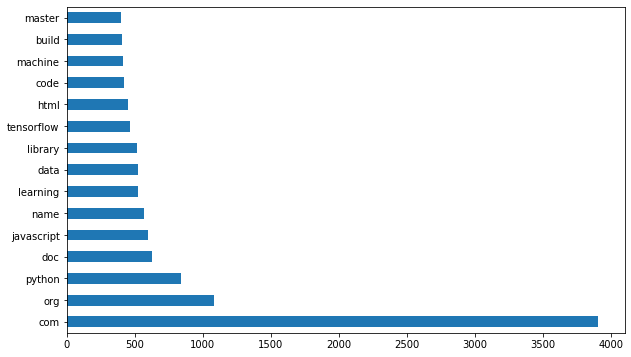

In [342]:
plt.figure(figsize = (10,6))
word_counts.plot.barh()

In [378]:
#IDF function
def idf(word):
    n_occurences = sum([1 for doc in df.cleaned if word in doc])
    return len(df.cleaned) / n_occurences

In [350]:
#Find unique word list from DF cleaned column
unique_words = pd.Series(' '.join(df.cleaned).split()).unique()
unique_words

array(['introduction', 'second', 'programming', ..., 'rxtx', 'sctp',
       'udt'], dtype=object)

In [379]:
# put the unique words into a data frame
idf_df = pd.DataFrame(dict(word = unique_words))\
.assign(idf = lambda df: df.word.apply(idf))\
.set_index('word').sort_values(by='idf', ascending = False)

In [385]:
idf_df.head(10)

,idf
word,
openjs,86.0
stackless,86.0
maratyszcza,86.0
assembler,86.0
pyjion,86.0
coreclr,86.0
pypy,86.0
heptapod,86.0
pyston,86.0


Text(0.5, 0, 'IDF value')

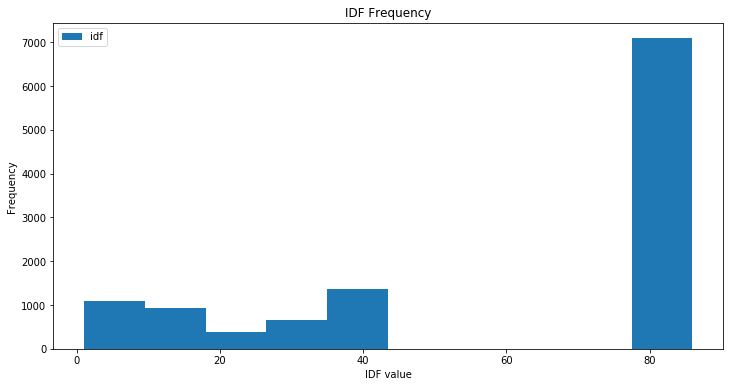

In [389]:
idf_df.plot.hist(figsize=(12,6))
plt.title('IDF Frequency')
plt.xlabel('IDF value')


In [390]:
df

,language,readme_contents,cleaned
0,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...
1,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...
2,C++,"<div align=""center"">\n <img src=""https://www....",div align center img src tensorflow org image ...
3,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...,smartthings public repo official list smartapp...
4,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",align center href getbootstrap com img src get...
...,...,...,...
81,PHP,![seclists.png](https://danielmiessler.com/ima...,seclists png danielmiessler com image seclists...
82,Python,[![Build Status](https://travis-ci.org/ytdl-or...,build status travis org ytdl org youtube svg b...
83,Python,# Awesome Machine Learning [![Awesome](https:/...,awesome machine learning awesome cdn rawgit co...
84,C++,Protocol Buffers - Google's data interchange f...,protocol buffer google data interchange format...


In [404]:
df['readme_words'] = df['cleaned'].apply(lambda x: len(x.split()))

In [405]:
df

,language,readme_contents,cleaned,readme_words
0,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...,319
1,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,68
2,C++,"<div align=""center"">\n <img src=""https://www....",div align center img src tensorflow org image ...,1177
3,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...,smartthings public repo official list smartapp...,51
4,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",align center href getbootstrap com img src get...,1155
...,...,...,...,...
81,PHP,![seclists.png](https://danielmiessler.com/ima...,seclists png danielmiessler com image seclists...,182
82,Python,[![Build Status](https://travis-ci.org/ytdl-or...,build status travis org ytdl org youtube svg b...,7716
83,Python,# Awesome Machine Learning [![Awesome](https:/...,awesome machine learning awesome cdn rawgit co...,15003
84,C++,Protocol Buffers - Google's data interchange f...,protocol buffer google data interchange format...,1602


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

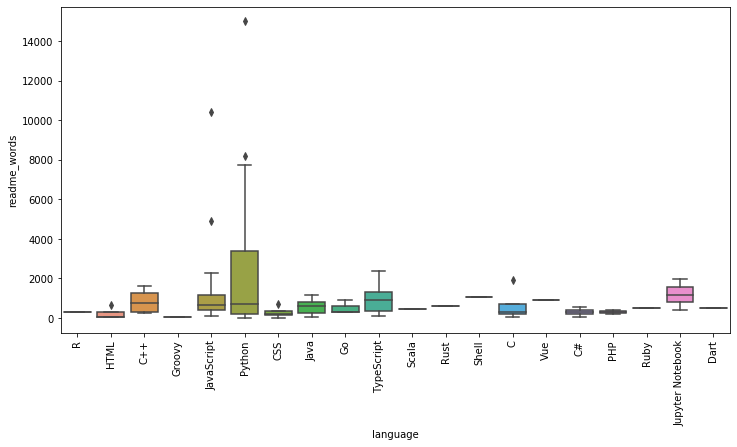

In [411]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'language', y = 'readme_words', data = df)
plt.xticks(rotation = 90)